In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
x = df[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','gender','SeniorCitizen','Partner',
        'Dependents','tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
y = df['Churn']

In [ ]:
# spliting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 19)
(2113, 19)
(4930,)
(2113,)


In [ ]:
# Seperating into numerical columns
x_train_num = x_train.select_dtypes(include = ['int64', 'float64'])
x_test_num = x_test.select_dtypes(include = ['int64', 'float64'])
print(x_train_num.shape)
print(x_test_num.shape)

(4930, 3)
(2113, 3)


In [ ]:
# Seperating into Categorical columns
x_train_cat = x_train.select_dtypes(include = ['object'])
x_test_cat = x_test.select_dtypes(include = ['object'])
print(x_train_cat.shape)
print(x_test_cat.shape)

(4930, 16)
(2113, 16)


In [ ]:
# For numerical preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_num_trans = sc.fit_transform(x_train_num)
x_test_num_trans = sc.transform(x_test_num)
print(x_train_num_trans.shape)
print(x_test_num_trans.shape)

(4930, 3)
(2113, 3)


In [ ]:
# for Categorical preprocessing
from sklearn.preprocessing import OrdinalEncoder
# Setting handle_unknown='ignore'
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_cat_trans = oe.fit_transform(x_train_cat)
x_test_cat_trans = oe.transform(x_test_cat)
print(x_train_cat_trans.shape)
print(x_test_cat_trans.shape)

(4930, 16)
(2113, 16)


In [ ]:
x_train_trans = np.concatenate((x_train_num_trans, x_train_cat_trans), axis=1)
x_test_trans = np.concatenate((x_test_num_trans, x_test_cat_trans), axis=1)
print(x_train_trans.shape)
print(x_test_trans.shape)

(4930, 19)
(2113, 19)


In [ ]:
x_train_transform = pd.DataFrame(x_train_trans)
x_test_transform = pd.DataFrame(x_test_trans)


In [ ]:
# prompt: merage x_train_transfrom and x_test_transfrom into one csv file

x_combined = pd.concat([x_train_transform, x_test_transform], axis=0)
x_combined.to_csv('combined_data.csv', index=False)

In [ ]:
dc = pd.read_csv(r'/content/combined_data.csv')
dc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.437818,-1.274242,-1.517257,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,967.0
1,-0.437818,1.376000,-0.325753,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2136.0
2,-0.437818,-0.703420,-1.467542,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2071.0
3,-0.437818,-0.336464,0.456430,1.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,990.0
4,-0.437818,0.356677,1.003295,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,2341.0


In [ ]:
# KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_transform, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(x_test_transform)
print(y_predict.shape)
print(y_test.shape)

(2113,)
(2113,)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
KNN_accuracy_score = accuracy_score(y_test,y_predict)
KNN_f1_score = f1_score(y_test,y_predict, pos_label='Yes')
print(KNN_accuracy_score)
print(KNN_f1_score)

0.7491717936583058
0.1945288753799392


In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_transform, y_train)

RandomForestClassifier()

In [ ]:
y_predict = rf.predict(x_test_transform)
print(y_predict.shape)
print(y_test.shape)

(2113,)
(2113,)


In [ ]:
RF_accuracy_score = accuracy_score(y_test,y_predict)
RF_f1_score = f1_score(y_test,y_predict, pos_label='Yes')
print(RF_accuracy_score)
print(RF_f1_score)

0.7662091812588736
0.4928131416837782


In [ ]:
# Random Forest Algorithm with feature importance
rf = RandomForestClassifier()
rf.fit(x_train_transform, y_train)
y_predict = rf.predict(x_test_transform)

# Feature Importance
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,MultipleLines,0.181378
2,InternetService,0.178955
18,TotalCharges,0.163171
15,PaperlessBilling,0.081107
17,MonthlyCharges,0.049778
6,TechSupport,0.047872
9,gender,0.041472
12,Dependents,0.028243
7,StreamingTV,0.026935
5,DeviceProtection,0.026778


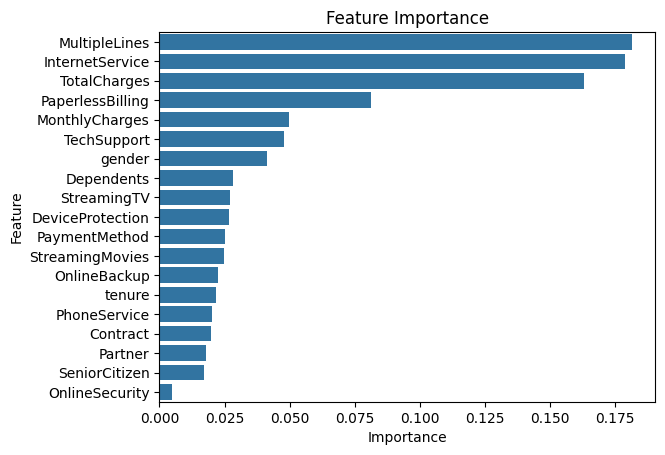

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Logistic Regreesion
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_transform, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = lr.predict(x_test_transform)
print(y_predict.shape)
print(y_test.shape)

(2113,)
(2113,)


In [ ]:
LR_accuracy_score = accuracy_score(y_test,y_predict)
LR_f1_score = f1_score(y_test,y_predict, pos_label='Yes')
print(LR_accuracy_score)
print(LR_f1_score)

0.7893989588263133
0.5500505561172901


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_transform, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = dt.predict(x_test_transform)
print(y_predict.shape)
print(y_test.shape)

(2113,)
(2113,)


In [ ]:
dt_accurracy_score = accuracy_score(y_test,y_predict)
dt_f1_score = f1_score(y_test,y_predict, pos_label='Yes')
print(dt_accurracy_score)
print(dt_f1_score)

0.7108376715570279
0.4755364806866953


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_transform, y_train)

SVC()

In [ ]:
y_predict = svm.predict(x_test_transform)
print(y_predict.shape)
print(y_test.shape)

(2113,)
(2113,)


In [ ]:
SVM_accuracy_score = accuracy_score(y_test,y_predict)
SVM_f1_score = f1_score(y_test,y_predict, pos_label='Yes')
print(SVM_accuracy_score)
print(SVM_f1_score)

0.7397065783246569
0.0


In [ ]:
# Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the transformed data for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model using the transformed training data
grid_search.fit(x_train_transform, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test_transform)  # Use transformed test data for prediction

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Accuracy: {accuracy_tuned}")
print(classification_report(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Accuracy: 0.7893989588263133
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1563
         Yes       0.62      0.49      0.55       550

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

[[1396  167]
 [ 278  272]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# ANN Model
from keras import models
from keras import layers

In [ ]:
ANN = models.Sequential()

In [ ]:
ANN_Reg = models.Sequential()
ANN_Reg.add(layers.Dense(units=132, activation='relu', input_shape=(x_train_transform.shape[1],)))
ANN_Reg.add(layers.Dense(units=32, activation='relu'))
ANN_Reg.add(layers.Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ANN.add(layers.Dense(units=10,activation='softmax'))   # Output layer

In [ ]:
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Before fitting the ANN model, convert y_train to numerical values
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on y_train and transform it
y_train_encoded = le.fit_transform(y_train)

# Now fit the ANN model with the encoded target variable
ANN.fit(x_train_transform, y_train_encoded, epochs=10)

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0013 - loss: 1075.9834    
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0668 - loss: 386.7581
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 30.7458
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6588 - loss: 0.7546
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.6062
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7492 - loss: 0.5418
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.5462
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7687 - loss: 0.4737
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.4651
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7542 - loss: 0.5004


In [ ]:
ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602 (2.36 KB)

 Trainable params: 200 (800.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402 (1.57 KB)

In [ ]:
# prompt: dipolyment

# Assuming you have already performed the necessary preprocessing steps and have x_train_transform, y_train, x_test_transform, and y_test available.

import pickle

# Example using Logistic Regression (replace with your preferred model)
# ... (Your existing model training code) ...

# Save the model
filename = 'finalized_model.pkl'
pickle.dump(best_model, open(filename, 'wb')) # Save best_model which is the result of hyperparameter tuning

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(x_test_transform)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {accuracy_loaded}")

# Example of saving the scaler
filename_scaler = 'scaler.pkl'
pickle.dump(sc, open(filename_scaler, 'wb'))

# Example of saving the ordinal encoder
filename_encoder = 'encoder.pkl'
pickle.dump(oe, open(filename_encoder, 'wb'))

Loaded Model Accuracy: 0.7893989588263133


In [ ]:
data = {
    'Model': ['KNN', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [KNN_accuracy_score, RF_accuracy_score, LR_accuracy_score, dt_accurracy_score, SVM_accuracy_score],
    'F1_Score': [KNN_f1_score, RF_f1_score, LR_f1_score, dt_f1_score, SVM_f1_score]
}

results_df = pd.DataFrame(data)
results_df

,Model,Accuracy,F1_Score
0,KNN,0.749172,0.194529
1,Random Forest,0.766209,0.492813
2,Logistic Regression,0.789399,0.550051
3,Decision Tree,0.710838,0.475536
4,SVM,0.739707,0.000000
